# Figure_4_ArgR

In [1]:
from pathlib import Path
import sys
import os.path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
from scipy.stats import f_oneway, gaussian_kde, mannwhitneyu, pearsonr, spearmanr
import seaborn as sns

from tqdm.notebook import tqdm
from pymodulon.compare import compare_ica
from pymodulon.core import IcaData
from pymodulon.io import load_json_model, save_to_json
from pymodulon.plotting import *

from pymodulon.util import explained_variance
from pymodulon.imodulondb import imdb_gene_presence
sns.set_style('whitegrid')

## Load the data from ./Data/ folder

In [2]:
precise1k = load_json_model('../Data/p1k.json.gz')

In [3]:
P1K_Gene_Presence_Matrix = pd.read_csv("../Data/P1K_Gene_Presence_Matrix.csv", index_col=0)

In [4]:
RegulonDB_TRN = pd.read_csv('../Data/RegulonDB_TRN_C_and_S.csv', index_col = 0)

### PRECISE-1K: X M A log_tpm gene_presence_matrix

In [5]:
P1K_M = precise1k.M

In [6]:
P1K_A = precise1k.A

In [7]:
P1K_X = precise1k.X

In [8]:
P1K_log_tpm = precise1k.log_tpm

### RegulonDB TRN

In [9]:
RegulonDB_TRN

,AcrR,Ada,AdiY,AgaR,AidB,AlaS,AllR,AraC,ArcA,ArcZ,...,YefM,YefMB,YgiV,YhaJ,YiaU,YjjQ,YqhC,ZntR,ZraR,Zur
aaeA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaeB,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaeR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaeX,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abgA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
znuC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
zraP,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
zraR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
zraS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
|

# dual regulator example 1: astCADBE - ArgR/NtrC
- 3D plot
- sample specific plotas

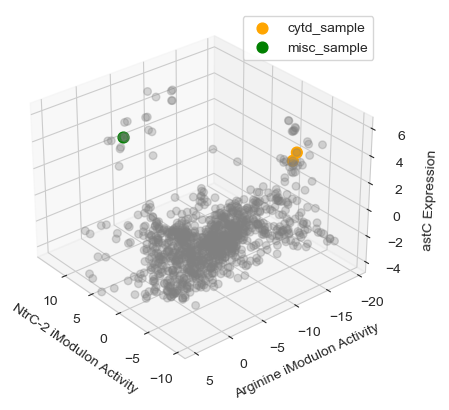

In [13]:
# 3D plot of NtrC, Arginine, and astC

# special samples
s1_cytd = ['p1k_00167','p1k_00168']
s2_misc = ['p1k_00049']

# data
ntrcA = precise1k.A.loc['NtrC-2'].tolist()
argA = precise1k.A.loc['Arginine'].tolist()
astC = precise1k.X.loc['b1748'].tolist()

# make plot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ntrcA, argA, astC, alpha = 0.3, color = 'gray',s=30)
ax.scatter(precise1k.A.loc['NtrC-2'][s1_cytd].tolist(), precise1k.A.loc['Arginine'][s1_cytd].tolist(), precise1k.X.loc['b1748'][s1_cytd].tolist(),alpha =1, color = 'orange',s=60,label = 'cytd_sample')
ax.scatter(precise1k.A.loc['NtrC-2'][s2_misc].tolist(), precise1k.A.loc['Arginine'][s2_misc].tolist(), precise1k.X.loc['b1748'][s2_misc].tolist(),alpha =1, color = 'green',s=60, label = 'misc_sample')
ax.set_ylim([min(argA), 6])

# Set labels for each axis
ax.set_xlabel('NtrC-2 iModulon Activity')
ax.set_ylabel('Arginine iModulon Activity')
ax.set_zlabel('astC Expression')
ax.legend()

ax.view_init(elev=30, azim=140)

# Display the plot
plt.show()

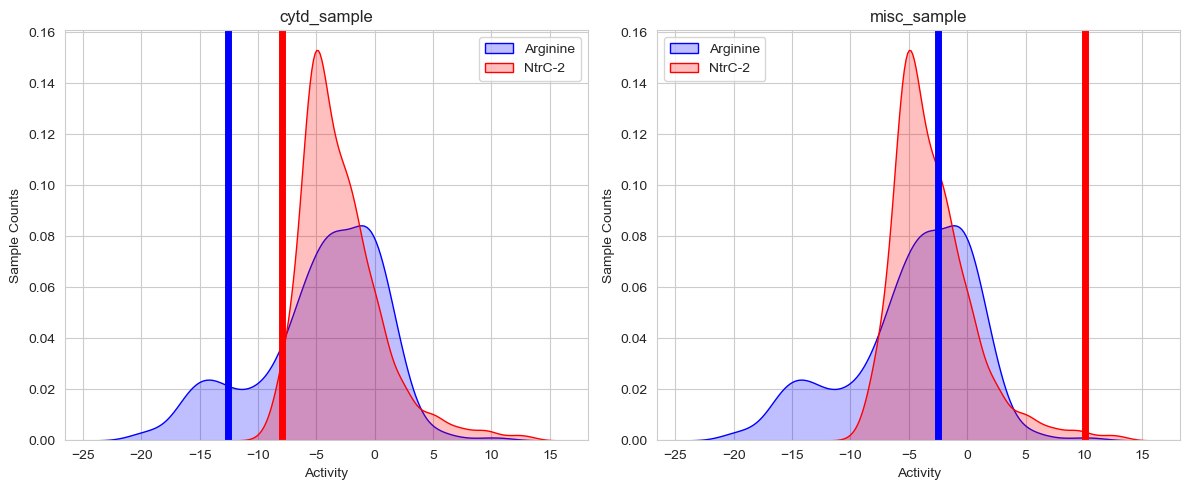

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

samples = [['p1k_00167','p1k_00168'],'p1k_00049']

# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plot for Sample 1
sns.kdeplot(argA, color='blue', label='Arginine', ax=axs[0], fill=True)
sns.kdeplot(ntrcA, color='red', label='NtrC-2', ax=axs[0], fill=True)
axs[0].axvline(precise1k.A[samples[0]].loc['Arginine'].mean(), color='blue', linewidth=5)
axs[0].axvline(precise1k.A[samples[0]].loc['NtrC-2'].mean(), color='red', linewidth=5)
axs[0].set_xlabel("Activity")
axs[0].set_ylabel("Sample Counts")
axs[0].legend()
axs[0].set_title("cytd_sample")

# Plot for Sample 2
sns.kdeplot(argA, color='blue', label='Arginine', ax=axs[1], fill=True)
sns.kdeplot(ntrcA, color='red', label='NtrC-2', ax=axs[1], fill=True)
axs[1].axvline(precise1k.A[samples[1]].loc['Arginine'], color='blue', linewidth=5)
axs[1].axvline(precise1k.A[samples[1]].loc['NtrC-2'], color='red', linewidth=5)
axs[1].set_xlabel("Activity")
axs[1].set_ylabel("Sample Counts")
axs[1].legend()
axs[1].set_title("misc_sample")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


# Bitome analysis of binding sites

Look at the binding site similarity in different parts of the argR regulon/iModulon
Does it support the idea that ICA works when the binding sites in the regulon have similar properties?


## Import packages and data

In [ ]:
import itertools
from pathlib import Path
import sys

from pymodulon.core import IcaData
from pymodulon.plotting import *
from pymodulon.io import load_json_model, save_to_json

sys.path.append('../../bitome2/')
sys.path.append('../')

from bitome.core import Bitome
from feature_functions import *

In [ ]:
pd.set_option('display.max_columns', 50)

In [ ]:
K12_DATA_PATH = Path('../data/bitome2/mg1655')

In [ ]:
# from GenBank annotation
origin = (3925743, 3925975)
# from 1. Duggin, I. G. & Bell, S. D. J. Mol. Biol. (2009). with the following terA/terC sequences:
# ter_a = 'AATTAGTATGTTGTAACTAAAGT'
# ter_c = 'ATATAGGATGTTGTAACTAATAT'
terminus = (1341745, 1609180)

In [ ]:
mg1655 = Bitome(
    Path(K12_DATA_PATH, 'NC_000913.3.gb'),
    name='MG1655',
    origin=origin, terminus=terminus,
    gene_table=Path(K12_DATA_PATH, 'gene_info_supp.csv'),
    tu_table=Path(K12_DATA_PATH, 'tu.csv'),
    operon_table=Path(K12_DATA_PATH, 'operon.csv'),
    tss_table=Path(K12_DATA_PATH, 'tss.csv'),
    # TODO PARSE TTS data
    tts_table=None,
    tfbs_table=Path(K12_DATA_PATH, 'tfbs.csv'),
    terminator_table=Path(K12_DATA_PATH, 'terminator.csv'),
    attenuator_table=Path(K12_DATA_PATH, 'attenuator.csv'),
    rbs_table=Path(K12_DATA_PATH, 'rbs.csv'),
    riboswitch_table=Path(K12_DATA_PATH, 'riboswitch.csv')
)

In [ ]:
ica_data = load_json_model('../data/precise2.json.gz')

## Motif score analysis

In [ ]:
# modify legacy PSSM format into Bitome 2 format
tf_pwm_db = rpwm('../data/motif_pwm_db.txt')
flhdc_pwm_old = tf_pwm_db['FlhDC']
flhdc_pssm = {base: [pos_dict[base] for pos_dict in flhdc_pwm_old] for base in 'ATCG'}

flhdc1_genes = ica_data.view_imodulon('FlhDC-1')['gene_name'].values
flhdc2_genes = ica_data.view_imodulon('FlhDC-2')['gene_name'].values
all_flhdc_genes = set(flhdc1_genes).union(flhdc2_genes)

gene2score = {}
for flhdc_gene in all_flhdc_genes:
    tus_for_gene = mg1655._gene_to_tus[ica_data.name2num(flhdc_gene)]
    gene_tu_df = mg1655.tu_table.loc[tus_for_gene]
    gene_tu_df_tss = gene_tu_df[gene_tu_df['tss'].notna()]
    scores = []
    for tu_id, tu_row in gene_tu_df_tss.iterrows():
        best_motif_match = mg1655.promoter_motif_search(tu_row.tss, tu_row.strand, flhdc_pssm)
        scores.append(best_motif_match.log_odds.values[0])
    if scores:
        gene2score[flhdc_gene] = np.mean(scores)

In [ ]:
flhdc1_df = ica_data.view_imodulon('FlhDC-1')
flhdc1_df['score'] = flhdc1_df['gene_name'].apply(lambda gn: gene2score.get(gn, None))
flhdc1_w_motif = flhdc1_df[flhdc1_df['score'].notna()]
flhdc1_w_motif = flhdc1_w_motif.set_index('gene_name')

_, ax = plt.subplots(figsize=(8, 6))

scatterplot(
    flhdc1_w_motif['score'], flhdc1_w_motif['gene_weight'],
    xlabel='FlhDC Motif Log-Odds Score',
    ylabel='FlhDC-1 Gene Weight',
    show_labels=True,
    fit_line=True,
    legend=False,
    ax=ax
)

Can we find known ArgP binding sites according to RegulonDB? 28252 28271, and 28272 28291

In [ ]:
bitome_genbank.motif_search(28000, 29000, +1, argp_pssm, n_best_matches=5)

Motif Matching near TSS

In [ ]:
bitome_genbank.promoter_motif_search(28288, 1, argp_pssm, n_best_matches=5)

This helpful function returns a DataFrame of all features in a given range

In [ ]:
bitome_genbank.features_in_range(1, 10000)

Getting Binding sites from the Bitome

In [ ]:
bitome_tfbs_df = mg1655.tfbs_table[mg1655.tfbs_table['left'].notna()]
bitome_tfbs_df['source'] = 'RegulonDB'
bitome_tfbs_df.head()